# 1. COMPRENSION DE DATOS

In [132]:
# IMPORTAMOS LAS LIBREARIAS A USAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [133]:
# IMPORTAMOS LOS DATOS CON LOS QUE SE VA A TRABAJAR
df = pd.read_csv('datos.csv')
df.shape

(475867, 16)

In [134]:
# Observamos los datos
df.head()

,PERIODO,FLG_CLIENTE_NUEVO,RECURRENCIA,QUINTIL_PROPENSION,LINEA_CENCOSUD,RNG_LINEA_CENCOSUD,NUM_TC,RNG_EDAD,REGIMEN_LABORAL,SEG_CONTACT,SEGMENTO,TIPO_TARJETA_CENCO,IDCLIENTE,CLTS,CLTS_CET,CLTS_VTA
0,202206,0,1,2,900,C,0,G,DEP,C3,TC2,CLASICA,6929637,1,0,0
1,202206,1,0,1,5000,E,1,F,INFOR,C2,TC2,CLASICA,6930931,1,0,0
2,202206,1,0,1,1000,C,2,F,INDEP,C1,TC2,CLASICA,6937115,1,1,0
3,202206,0,0,5,1000,C,0,G,INDEP,C3,TC3,CLASICA,6938130,1,0,0
4,202206,0,1,5,3000,D,2,G,DEP,C2,TC2,CLASICA,6940903,1,1,0


In [135]:
# renombramos la columna para usos posteriores
df = df.rename(columns={'CLTS_VTA': 'CLTS_VTA_REAL'})

In [136]:
df = df.drop('RNG_LINEA_CENCOSUD', axis=1)

In [137]:
# Definir los valores mínimos y máximos por rango
valores_min = [500, 600, 1100, 3100, 6100, 10100]
valores_max = [500, 1000, 3000, 6000, 10000, 15000]
rangos = ['B', 'C', 'D', 'E', 'F', 'G']

# Aplicar la función cut() para crear los rangos y agregar la nueva columna
df['RNG_LINEA_CENCOSUD'] = pd.cut(df['LINEA_CENCOSUD'], bins=valores_min + [float('inf')], labels=rangos)

In [138]:
# Extraer la columna que deseas mover
columna_a_mover = df.pop('RNG_LINEA_CENCOSUD')

# Insertar la columna extraída al costado de la columna 'A'
df.insert(loc=df.columns.get_loc('LINEA_CENCOSUD')+1, column='RNG_LINEA_CENCOSUD', value=columna_a_mover)

In [139]:
df

,PERIODO,FLG_CLIENTE_NUEVO,RECURRENCIA,QUINTIL_PROPENSION,LINEA_CENCOSUD,RNG_LINEA_CENCOSUD,NUM_TC,RNG_EDAD,REGIMEN_LABORAL,SEG_CONTACT,SEGMENTO,TIPO_TARJETA_CENCO,IDCLIENTE,CLTS,CLTS_CET,CLTS_VTA_REAL
0,202206,0,1,2,900,C,0,G,DEP,C3,TC2,CLASICA,6929637,1,0,0
1,202206,1,0,1,5000,E,1,F,INFOR,C2,TC2,CLASICA,6930931,1,0,0
2,202206,1,0,1,1000,C,2,F,INDEP,C1,TC2,CLASICA,6937115,1,1,0
3,202206,0,0,5,1000,C,0,G,INDEP,C3,TC3,CLASICA,6938130,1,0,0
4,202206,0,1,5,3000,D,2,G,DEP,C2,TC2,CLASICA,6940903,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475862,202205,1,0,2,800,C,1,A,INDEP,C3,TC3,CLASICA,75591256,1,0,0
475863,202205,1,0,1,700,C,1,B,INFOR,C1,TC2,CLASICA,75591326,1,1,0
475864,202205,1,0,4,1000,C,2,B,DEP,C3,TC3,CLASICA,75607226,1,1,0
475865,202205,1,0,2,3500,E,1,A,DEP,C3,TC2,CLASICA,75609095,1,0,0


1.1 IDENTIFICAMOS LAS VARIABLES PARA USAR EN EL MODELO

In [141]:
# Calcular el valor mínimo y máximo de linea cencosud
min_precios = df.groupby('RNG_LINEA_CENCOSUD')['LINEA_CENCOSUD'].min()
max_precios = df.groupby('RNG_LINEA_CENCOSUD')['LINEA_CENCOSUD'].max()

# Imprimir los resultados
print("Valor mínimo de precios por rango:")
print(min_precios)
print("\nValor máximo de precios por rango:")
print(max_precios)

Valor mínimo de precios por rango:
RNG_LINEA_CENCOSUD
B        NaN
C      700.0
D     1200.0
E     3200.0
F     6200.0
G    10300.0
Name: LINEA_CENCOSUD, dtype: float64

Valor máximo de precios por rango:
RNG_LINEA_CENCOSUD
B        NaN
C     1100.0
D     3100.0
E     6100.0
F    10100.0
G    15000.0
Name: LINEA_CENCOSUD, dtype: float64


1.2 CREAMOS UN ID A LOS PERIODOS

In [142]:
# creamos la columna idperiodo
df['IDPERIODO'] = pd.factorize(df['PERIODO'])[0] + 1
col = df.pop('IDPERIODO')

# Insertar la columna 'col3' al costado de 'col1'
df.insert(df.columns.get_loc('PERIODO') + 1, 'IDPERIODO', col)

In [143]:
# Verificar duplicados de 'idcliente' en un mismo periodo
duplicados = df.duplicated(subset=['IDCLIENTE', 'IDPERIODO'])

# Imprimir los registros con duplicados
print(df[duplicados])

Empty DataFrame
Columns: [PERIODO, IDPERIODO, FLG_CLIENTE_NUEVO, RECURRENCIA, QUINTIL_PROPENSION, LINEA_CENCOSUD, RNG_LINEA_CENCOSUD, NUM_TC, RNG_EDAD, REGIMEN_LABORAL, SEG_CONTACT, SEGMENTO, TIPO_TARJETA_CENCO, IDCLIENTE, CLTS, CLTS_CET, CLTS_VTA_REAL]
Index: []


In [144]:
# verificamos cuantos datos hay en la columna si es que tiene solo un dato se elimina
df['CLTS'].unique()

array([1], dtype=int64)

In [145]:
df['SEGMENTO'].unique()

array(['TC2', 'TC3', 'TC1'], dtype=object)

In [146]:
df['SEG_CONTACT'].unique()

array(['C3', 'C2', 'C1'], dtype=object)

In [147]:
# filtramos solo las llamadas respondidas
# data = df[df['CLTS_CET'] == 1]

In [148]:
data = df.copy()

In [149]:
# Eliminamos columnas que solo tienen una variable o datos innecesarios para el modelo de prediccion

data = data.drop('CLTS', axis=1)
# data = data.drop('CLTS_CET', axis=1)
data = data.drop('IDCLIENTE', axis=1)
data = data.drop('PERIODO', axis=1)

In [150]:
data.head()

,IDPERIODO,FLG_CLIENTE_NUEVO,RECURRENCIA,QUINTIL_PROPENSION,LINEA_CENCOSUD,RNG_LINEA_CENCOSUD,NUM_TC,RNG_EDAD,REGIMEN_LABORAL,SEG_CONTACT,SEGMENTO,TIPO_TARJETA_CENCO,CLTS_CET,CLTS_VTA_REAL
0,1,0,1,2,900,C,0,G,DEP,C3,TC2,CLASICA,0,0
1,1,1,0,1,5000,E,1,F,INFOR,C2,TC2,CLASICA,0,0
2,1,1,0,1,1000,C,2,F,INDEP,C1,TC2,CLASICA,1,0
3,1,0,0,5,1000,C,0,G,INDEP,C3,TC3,CLASICA,0,0
4,1,0,1,5,3000,D,2,G,DEP,C2,TC2,CLASICA,1,0


In [151]:
# Observamos los tipos de variables que ahora tenemos
var_categoricas=data.select_dtypes(include=['object']).columns.to_list()
var_numericas=data.select_dtypes(include=['number']).columns.to_list()

In [152]:
var_categoricas

['RNG_EDAD',
 'REGIMEN_LABORAL',
 'SEG_CONTACT',
 'SEGMENTO',
 'TIPO_TARJETA_CENCO']

In [153]:
var_numericas

['IDPERIODO',
 'FLG_CLIENTE_NUEVO',
 'RECURRENCIA',
 'QUINTIL_PROPENSION',
 'LINEA_CENCOSUD',
 'NUM_TC',
 'CLTS_CET',
 'CLTS_VTA_REAL']

In [154]:
# realiazmos una copia para el entrenamiento
new_data = data.copy()

In [156]:
# observamos si los datos estan desbalanceados

new_data['CLTS_VTA_REAL'].value_counts()

0    472904
1      2963
Name: CLTS_VTA_REAL, dtype: int64

## VISUALIZACION DE LOS DATOS

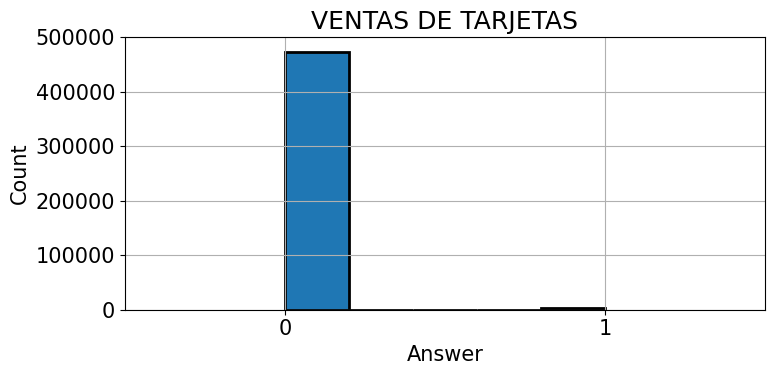

In [158]:
# Ajustar el tamaño de fuente.
plt.rcParams['font.size'] = 15 

# Crear una figura y ajusta su tamaño.
f = plt.figure(figsize=(8,4))

# Crear un subplot o subtrama - al ser una sola figura es 1,1,1.
ax = f.add_subplot(1,1,1)

# Gráfica tus datos usando 'hist'. Pasa el objeto 'ax' a Pandas. Agrega un borde negro con un groso de 2.
new_data['CLTS_VTA_REAL'].hist(ax=ax,bins=5, edgecolor='black', linewidth=2)

# Establece los límites en el eje x.
ax.set_xlim([-0.5, 1.5])

# Establece la frecuencia de tick. Tenemos 0 y 1 que corresponden a Sí y No respectivamente.
ax.set_xticks([0, 1])

# Etiquetar xtick labels.
ax.set_xticklabels(["0", "1"])

# Crea el título.
ax.set_title("VENTAS DE TARJETAS")

# Establece la etiqueta del eje X.
ax.set_xlabel("Answer")

# Establece la etiqueta del eje Y.
ax.set_ylabel("Count")

# Establece los límites superior/inferior del eje y.
ax.set_ylim([0, 500000])

# Mace que las cosas sean bonitas, no es necesario, pero se ajusta al tamaño de la figura.
f.tight_layout()

LA DIFERENCIA ENTRE LOS DATOS ES MUY ALTA, POR LO CUAL SE TRABAJARA CON UN SOBREMUESTREO

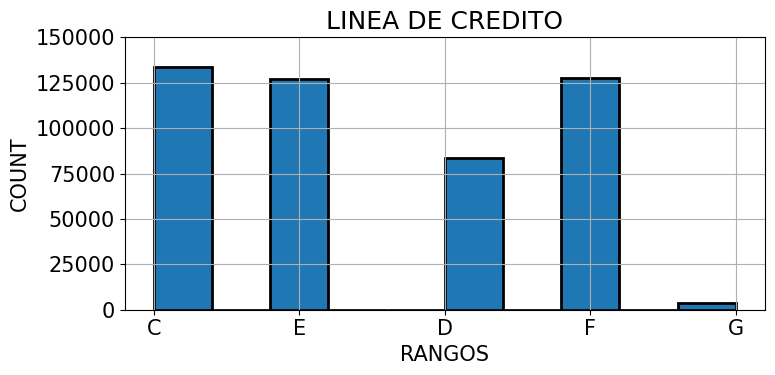

In [163]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
new_data["RNG_LINEA_CENCOSUD"].hist(ax=ax,bins=10, edgecolor='black', linewidth=2)
ax.set_title("LINEA DE CREDITO")
ax.set_ylim([0, 150000])
ax.set_xlabel("RANGOS")
ax.set_ylabel("COUNT")
f.tight_layout()

# TRANSFORMACION DE DATOS

In [164]:
# Lista de columnas categóricas a codificar
columnas_categoricas = ['RNG_LINEA_CENCOSUD', 'RNG_EDAD', 'REGIMEN_LABORAL', 'SEG_CONTACT', 'SEGMENTO', 'TIPO_TARJETA_CENCO']

# DataFrame con las columnas numéricas originales
df_numerico = new_data.drop(columnas_categoricas, axis=1)

# Aplicar one-hot encoding solo a las columnas categóricas
df_codificado = pd.get_dummies(new_data[columnas_categoricas], drop_first=True)
df_codificado = df_codificado.replace({True: 1, False: 0})

# Combinar el DataFrame codificado con las columnas numéricas originales
df_final = pd.concat([df_numerico, df_codificado], axis=1)

In [165]:
df_final.head()

,IDPERIODO,FLG_CLIENTE_NUEVO,RECURRENCIA,QUINTIL_PROPENSION,LINEA_CENCOSUD,NUM_TC,CLTS_CET,CLTS_VTA_REAL,RNG_LINEA_CENCOSUD_C,RNG_LINEA_CENCOSUD_D,...,RNG_EDAD_F,RNG_EDAD_G,RNG_EDAD_Z,REGIMEN_LABORAL_INDEP,REGIMEN_LABORAL_INFOR,SEG_CONTACT_C2,SEG_CONTACT_C3,SEGMENTO_TC2,SEGMENTO_TC3,TIPO_TARJETA_CENCO_CLASICA
0,1,0,1,2,900,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
1,1,1,0,1,5000,1,0,0,0,0,...,1,0,0,0,1,1,0,1,0,1
2,1,1,0,1,1000,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,1,0,0,5,1000,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,1
4,1,0,1,5,3000,2,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1


In [166]:
# guardamos los datos de caracteristicas a excepcion de la columna a predecir
X = df_final.drop('CLTS_VTA_REAL', axis=1)

In [167]:
# guardamos los datos que queremos predecir despues del testeo
y = df_final['CLTS_VTA_REAL']

In [168]:
# importamos el train_test_split para el entrenamiento de los datos con un 80% de datos como entrenamiento y el 20% como testeo
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [169]:
# hacemos un shape para ver la cantidad de datos
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((380693, 26), (95174, 26), (380693,), (95174,))

# PRIMERO INTENTAREMOS TRABAJAR EL MODELO CON UN FIT_RESAMPLE

In [170]:
from imblearn.over_sampling import RandomOverSampler

# Crear el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo a ambos conjuntos
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [171]:
y_train.value_counts()

0    378311
1      2382
Name: CLTS_VTA_REAL, dtype: int64

In [172]:
y_train_resampled.value_counts()

0    378311
1    378311
Name: CLTS_VTA_REAL, dtype: int64

In [173]:
new_data['CLTS_VTA_REAL'].value_counts()

0    472904
1      2963
Name: CLTS_VTA_REAL, dtype: int64

In [174]:
# probamos el modelo de regresion lineal
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [175]:
print(model_rf.score(X_test, y_test))

0.96755416395234


In [176]:
# corremos la prediccion con el dato de testeo y nos da la prediccion del modelo segun el dato de testeo
y_pred = model_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [177]:
# comparamos con los datos de testeo reales con los que nos da el modelo
list(y_test)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [178]:
# evaluamos el modelo usando crossvalidation
from sklearn.model_selection import cross_val_score
linear_scores = cross_val_score(model_rf, X, y, scoring='neg_mean_squared_error', cv=10)
linear_scores

array([-0.00825856, -0.00783828, -0.00689264, -0.00703974, -0.00695568,
       -0.00720785, -0.00741799, -0.00731308, -0.00733409, -0.00695583])

In [179]:
linear_rmse_scores =np.sqrt(-linear_scores)
linear_rmse_scores

array([0.09087661, 0.08853403, 0.08302192, 0.08390315, 0.08340073,
       0.08489906, 0.08612777, 0.08551652, 0.0856393 , 0.0834016 ])

In [180]:
# creamos una funcion para que nos de los valores de media scores y division standard
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard Deviaton:', scores.std())

In [181]:
display_scores(linear_rmse_scores)

Scores: [0.09087661 0.08853403 0.08302192 0.08390315 0.08340073 0.08489906
 0.08612777 0.08551652 0.0856393  0.0834016 ]
Mean: 0.0855320685747053
Standard Deviaton: 0.0023744252798549525


In [182]:
from sklearn.linear_model import LogisticRegression

model_lg=LogisticRegression(max_iter=1000)
model_lg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(max_iter=1000)

In [183]:
print(model_lg.score(X_test, y_test))

0.7853930695357976


In [184]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [185]:
print(model_xgb.score(X_test, y_test))

0.8812911089163007


In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#FUNCION PARA GRAFICAR LA CURVAR ROC Y HALLAR GINI
def roc_gini(modelo):
    y_pred = modelo.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
    auc_rf = auc(fpr_rf, tpr_rf)
    gini_rf = auc(fpr_rf, tpr_rf) * 2 - 1
    f = plt.figure(1)
    f.set_figwidth(10)
    f.set_figheight(10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_rf, tpr_rf, label='Modelo (area = {:.3f}, gini= {:.3f})'.format(auc_rf,gini_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return auc_rf

In [187]:
y_preds=model_rf.predict(X_test)
print("Reporte de metricas Regresion logistica: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)

Reporte de metricas Regresion logistica: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     94593
           1       0.05      0.23      0.08       581

    accuracy                           0.97     95174
   macro avg       0.52      0.60      0.53     95174
weighted avg       0.99      0.97      0.98     95174

Matriz de Confusión:
 [[91952  2641]
 [  447   134]]


Reporte de metricas Regresion logistica: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     94593
           1       0.05      0.23      0.08       581

    accuracy                           0.97     95174
   macro avg       0.52      0.60      0.53     95174
weighted avg       0.99      0.97      0.98     95174

Matriz de Confusión:
 [[91952  2641]
 [  447   134]]


Text(0, 0.5, 'Valor Real')

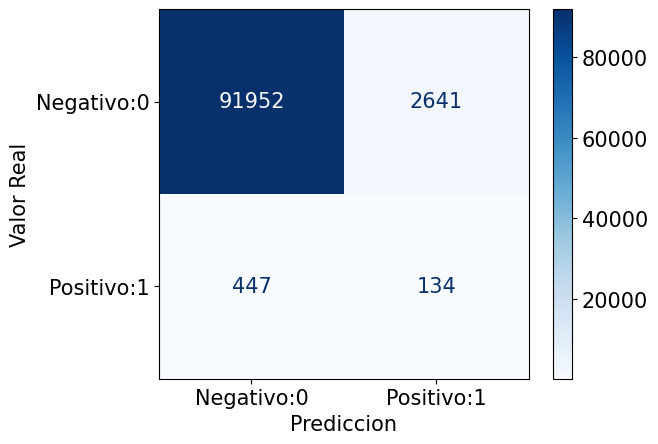

In [188]:
y_preds=model_rf.predict(X_test)
print("Reporte de metricas Regresion logistica: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)

mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

In [189]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)  

print()
print("Precision: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 -Score: ",f1)


Precision:  0.96755416395234
Precision:  0.04828828828828829
Recall:  0.2306368330464716
F1 -Score:  0.07985697258641239


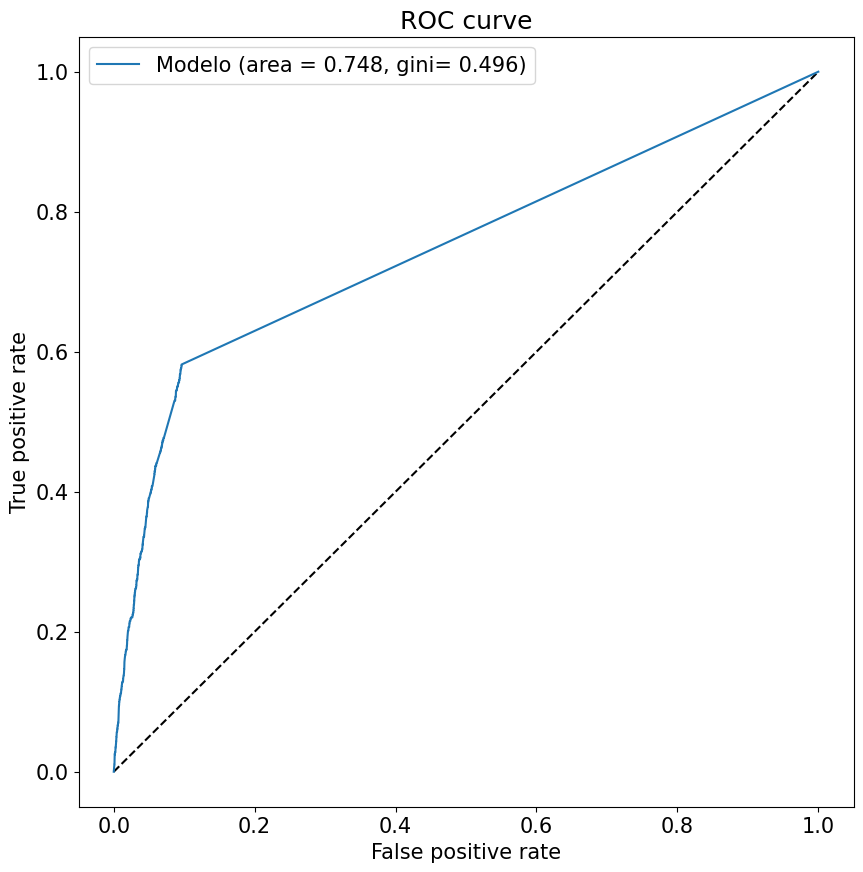

In [190]:
roc_auc=roc_gini(model_rf)

Reporte de metricas Regresion logistica: 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88     94593
           1       0.03      0.93      0.05       581

    accuracy                           0.79     95174
   macro avg       0.51      0.86      0.46     95174
weighted avg       0.99      0.79      0.87     95174

Matriz de Confusión:
 [[74209 20384]
 [   41   540]]


Text(0, 0.5, 'Valor Real')

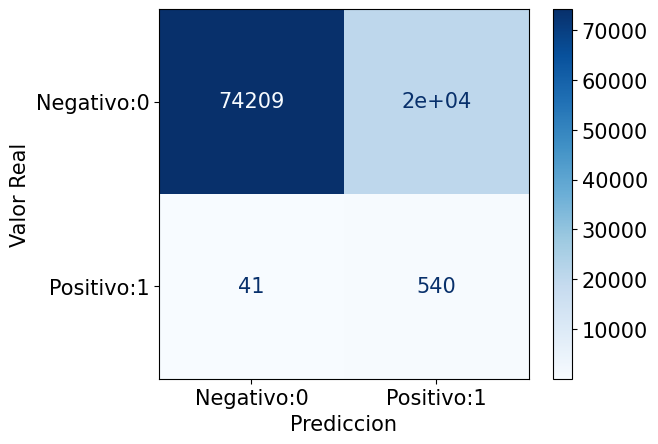

In [191]:
y_preds=model_lg.predict(X_test)
print("Reporte de metricas Regresion logistica: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)

mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

In [192]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)  

print()
print("Precision: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 -Score: ",f1)


Precision:  0.7853930695357976
Precision:  0.025807684955075513
Recall:  0.9294320137693631
F1 -Score:  0.050220878865380146


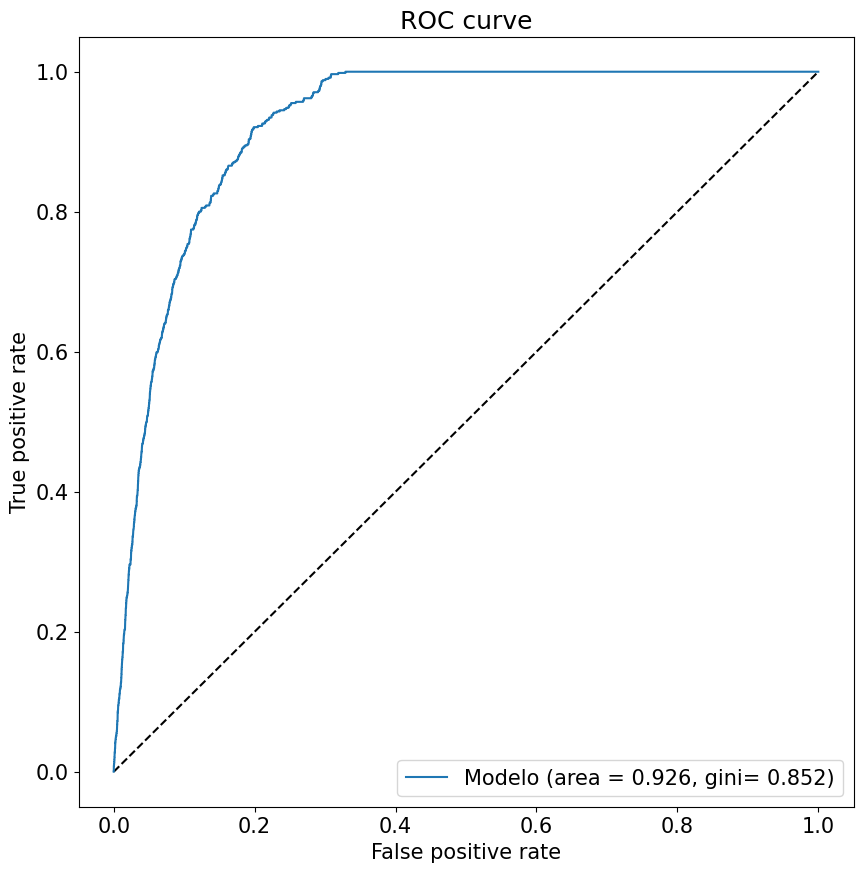

In [193]:
roc_auc=roc_gini(model_lg)

Reporte de metricas XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     94593
           1       0.04      0.72      0.07       581

    accuracy                           0.88     95174
   macro avg       0.52      0.80      0.50     95174
weighted avg       0.99      0.88      0.93     95174

Matriz de Confusión:
 [[83455 11138]
 [  160   421]]


Text(0, 0.5, 'Valor Real')

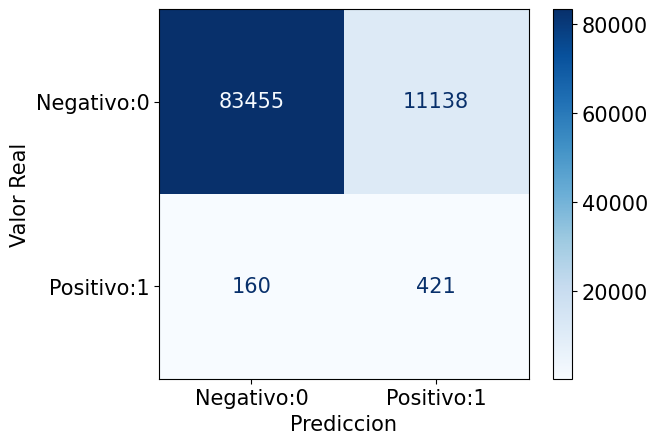

In [194]:
y_preds = model_xgb.predict(X_test)
print("Reporte de metricas XGBoost: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)


mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

In [195]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)  

print()
print("Precision: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 -Score: ",f1)


Precision:  0.8812911089163007
Precision:  0.03642183579894454
Recall:  0.7246127366609294
F1 -Score:  0.06935749588138385


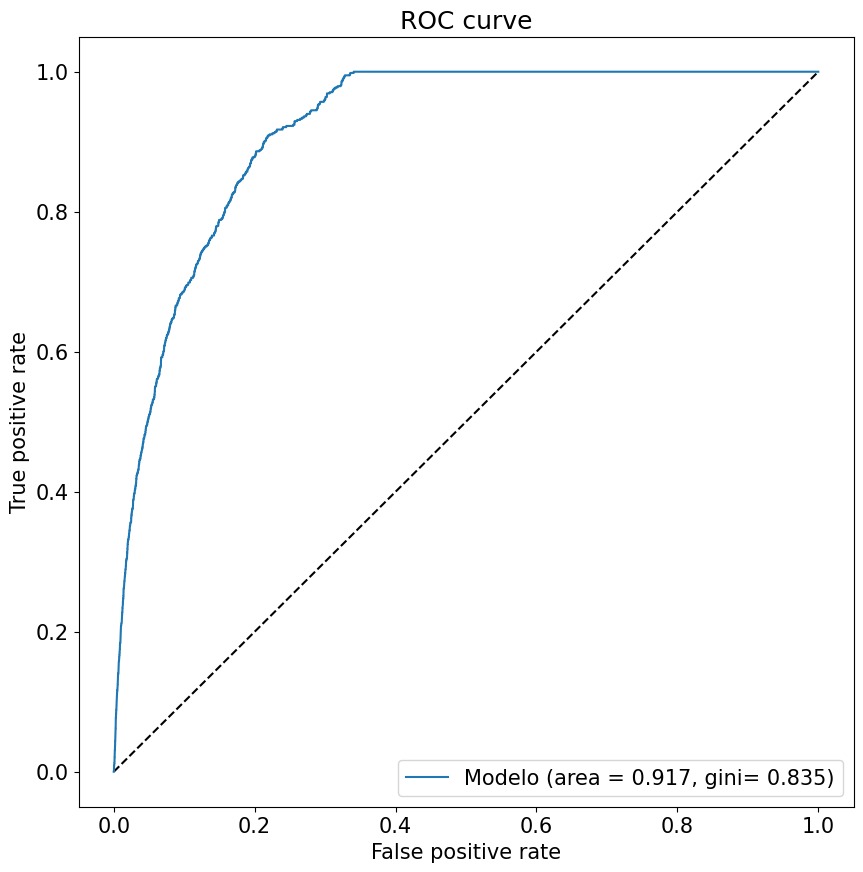

In [196]:
roc_auc=roc_gini(model_xgb)

# ROBUSCALER y el fitsampler

In [197]:
st_x=RobustScaler()

X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)

In [198]:
from imblearn.over_sampling import RandomOverSampler

# Crear el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo a ambos conjuntos
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [199]:

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [200]:
print(model_rf.score(X_test, y_test))

0.9675751780948578


In [201]:
from sklearn.linear_model import LogisticRegression

model_lg=LogisticRegression(max_iter=1000)
model_lg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(max_iter=1000)

In [202]:
print(model_lg.score(X_test, y_test))

0.7895538697543447


In [203]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [204]:
print(model_xgb.score(X_test, y_test))

0.8812911089163007


In [205]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#FUNCION PARA GRAFICAR LA CURVAR ROC Y HALLAR GINI
def roc_gini(modelo):
    y_pred = modelo.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
    auc_rf = auc(fpr_rf, tpr_rf)
    gini_rf = auc(fpr_rf, tpr_rf) * 2 - 1
    f = plt.figure(1)
    f.set_figwidth(10)
    f.set_figheight(10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_rf, tpr_rf, label='Modelo (area = {:.3f}, gini= {:.3f})'.format(auc_rf,gini_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return auc_rf

In [206]:
y_preds=model_rf.predict(X_test)
print("Reporte de metricas Regresion logistica: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)

Reporte de metricas Regresion logistica: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     94593
           1       0.05      0.23      0.08       581

    accuracy                           0.97     95174
   macro avg       0.52      0.60      0.53     95174
weighted avg       0.99      0.97      0.98     95174

Matriz de Confusión:
 [[91956  2637]
 [  449   132]]


In [207]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)  

print()
print("Precision: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 -Score: ",f1)


Precision:  0.9675751780948578
Precision:  0.047670639219934995
Recall:  0.22719449225473323
F1 -Score:  0.07880597014925374


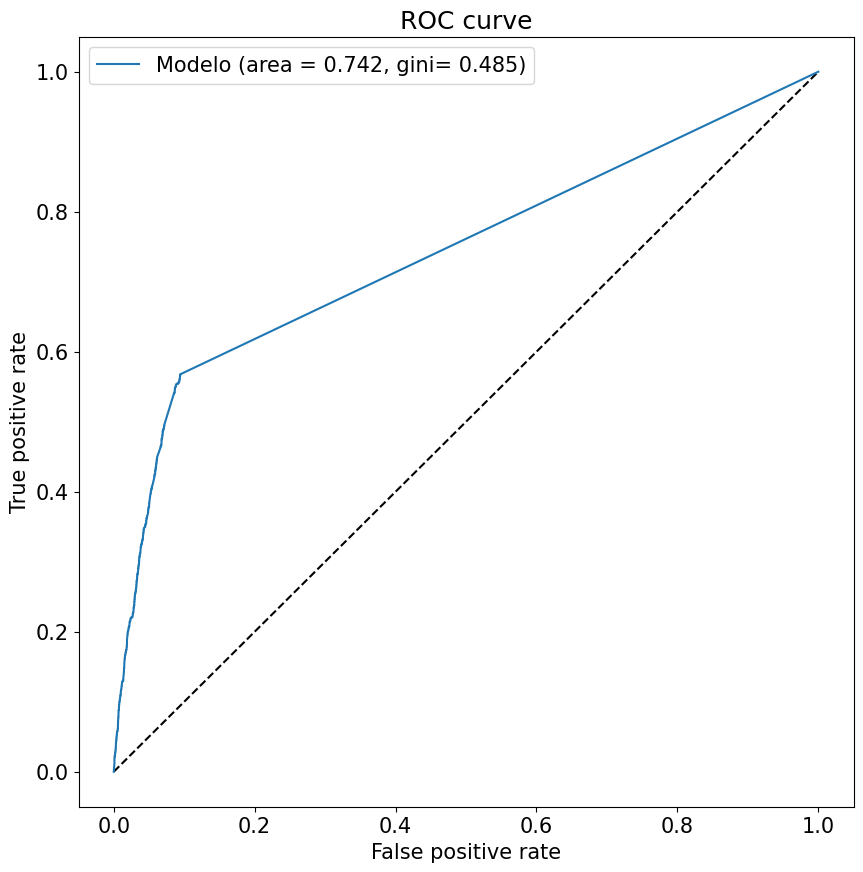

In [208]:
roc_auc=roc_gini(model_rf)

Reporte de metricas Regresion logistica: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     94593
           1       0.03      0.93      0.05       581

    accuracy                           0.79     95174
   macro avg       0.51      0.86      0.47     95174
weighted avg       0.99      0.79      0.88     95174

Matriz de Confusión:
 [[74606 19987]
 [   42   539]]


Text(0, 0.5, 'Valor Real')

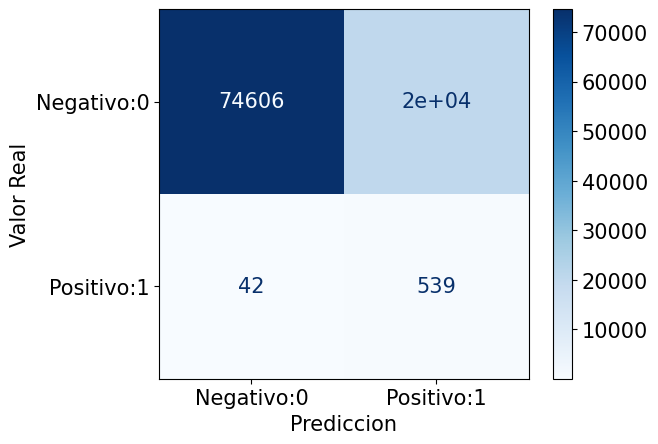

In [209]:
y_preds=model_lg.predict(X_test)
print("Reporte de metricas Regresion logistica: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)

mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

In [210]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)  

print()
print("Precision: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 -Score: ",f1)


Precision:  0.7895538697543447
Precision:  0.026259378349410504
Recall:  0.927710843373494
F1 -Score:  0.051073103709669776


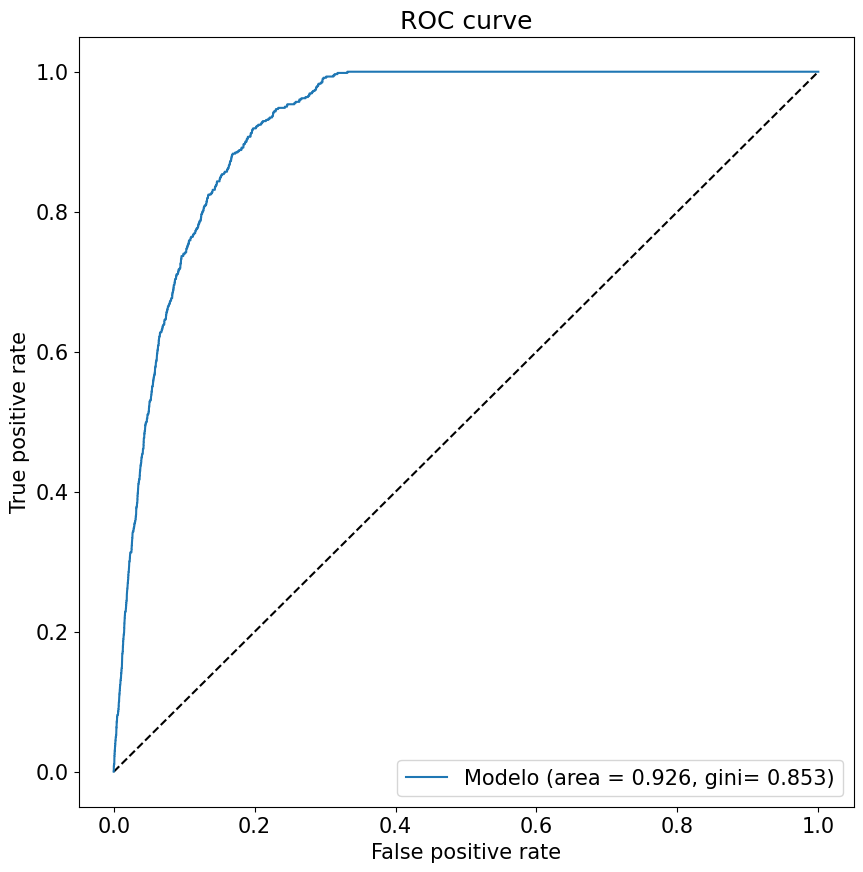

In [211]:
roc_auc=roc_gini(model_lg)

Reporte de metricas XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     94593
           1       0.04      0.72      0.07       581

    accuracy                           0.88     95174
   macro avg       0.52      0.80      0.50     95174
weighted avg       0.99      0.88      0.93     95174

Matriz de Confusión:
 [[83455 11138]
 [  160   421]]


Text(0, 0.5, 'Valor Real')

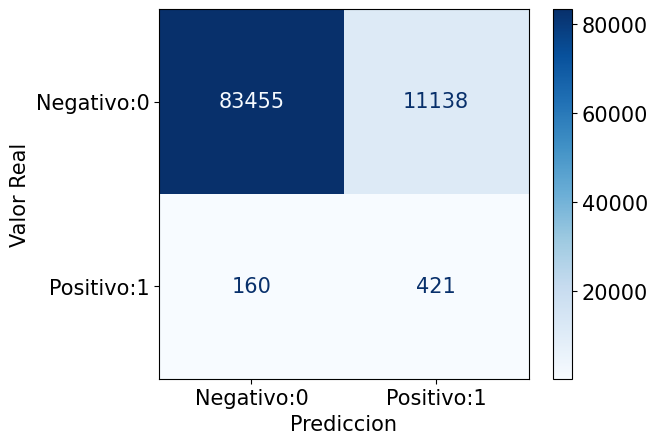

In [212]:
y_preds = model_xgb.predict(X_test)
print("Reporte de metricas XGBoost: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)


mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

In [213]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1=f1_score(y_test, y_preds)  

print()
print("Precision: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 -Score: ",f1)


Precision:  0.8812911089163007
Precision:  0.03642183579894454
Recall:  0.7246127366609294
F1 -Score:  0.06935749588138385


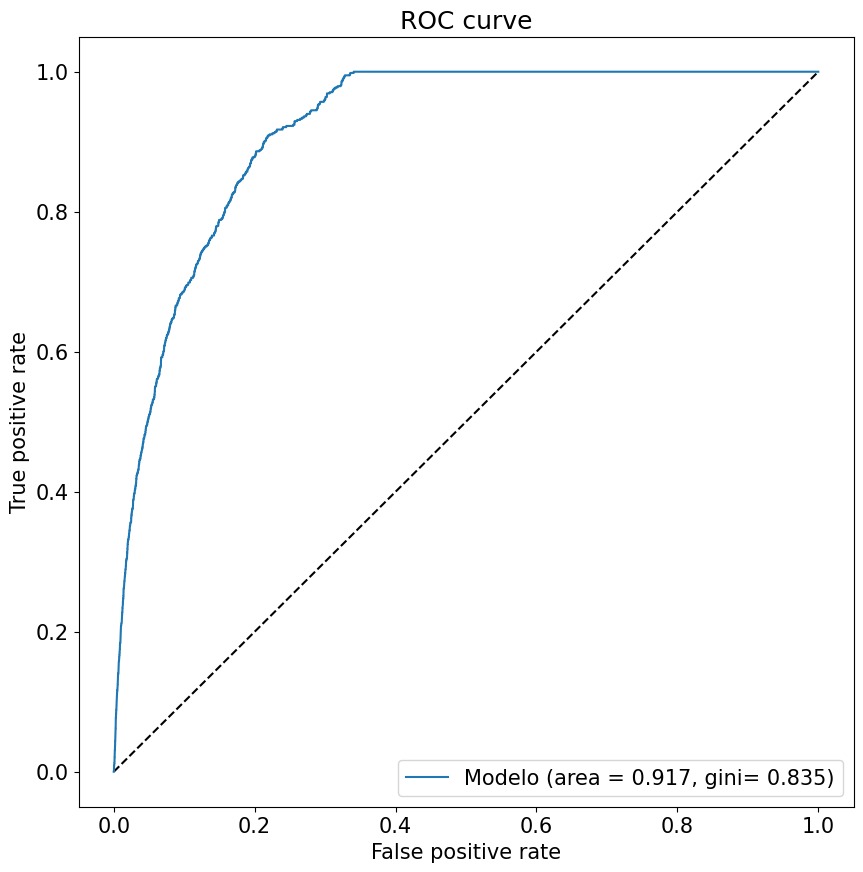

In [214]:
roc_auc=roc_gini(model_xgb)

In [215]:
# intentamos con otro modelo

import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train_resampled, y_train_resampled)


LGBMClassifier()

In [216]:
print(model.score(X_test, y_test))

0.8511148002605754


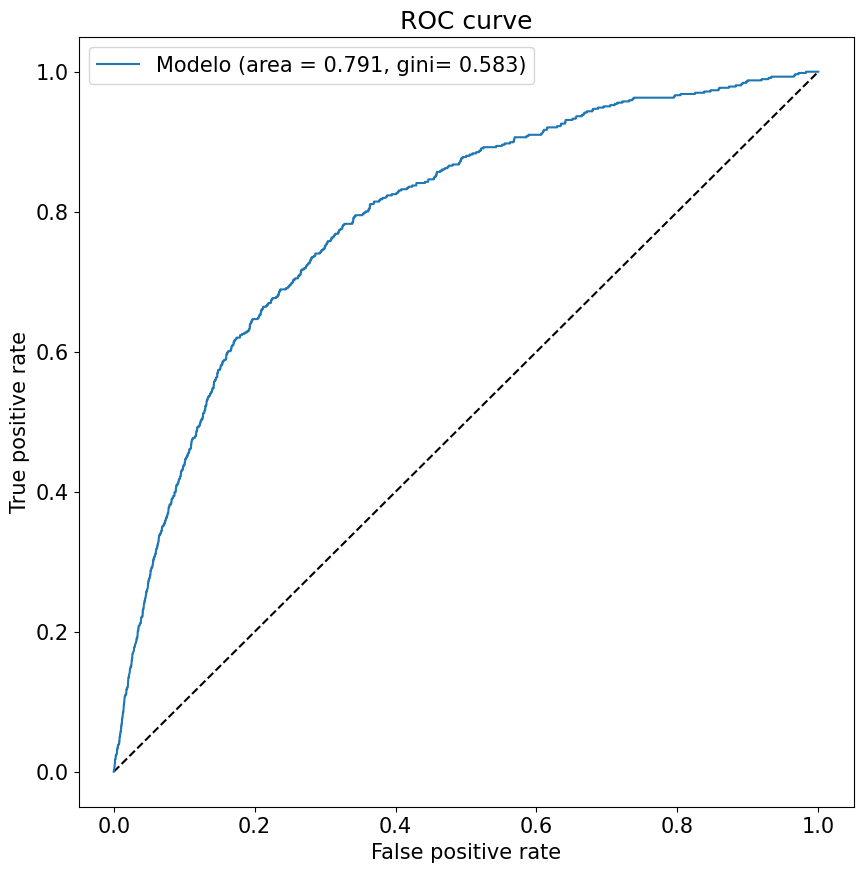

In [127]:
roc_auc=roc_gini(model)

In [128]:
y_score=model.predict_proba(X_test)[:,1]
umbral=0.4
y_preds= (y_score>umbral)*1

Reporte de metricas XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     94593
           1       0.04      0.72      0.07       581

    accuracy                           0.88     95174
   macro avg       0.52      0.80      0.50     95174
weighted avg       0.99      0.88      0.93     95174

Matriz de Confusión:
 [[83455 11138]
 [  160   421]]


Text(0, 0.5, 'Valor Real')

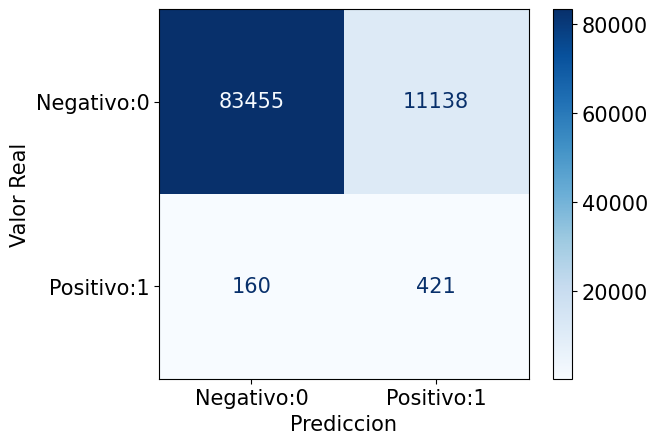

In [217]:
# y_preds = model.predict(X_test)
print("Reporte de metricas XGBoost: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)


mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

In [130]:
# prueba
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    # Agrega más hiperparámetros y sus valores a probar según tus necesidades
}

In [218]:
#lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Crear un modelo LGBMClassifier
#model = LGBMClassifier()
# Crear un objeto GridSearchCV y configurarlo con el modelo, los parámetros y la métrica de evaluación
#grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
# Ajustar el GridSearchCV a los datos de entrenamiento
#grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [219]:
# Obtener los mejores parámetros encontrados
#best_params = grid_search.best_params_
#print("Mejores parámetros:", best_params)

Mejores parámetros: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 300, 'subsample': 0.8}


In [220]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(colsample_bytree= 0.9, learning_rate= 0.1, max_depth= 7, min_child_samples= 20, n_estimators= 300, subsample= 0.8)
model_lgb.fit(X_train_resampled, y_train_resampled)

LGBMClassifier(max_depth=7, n_estimators=300, subsample=0.8)

In [221]:
print(model_lgb.score(X_test, y_test))

0.8745245550255322


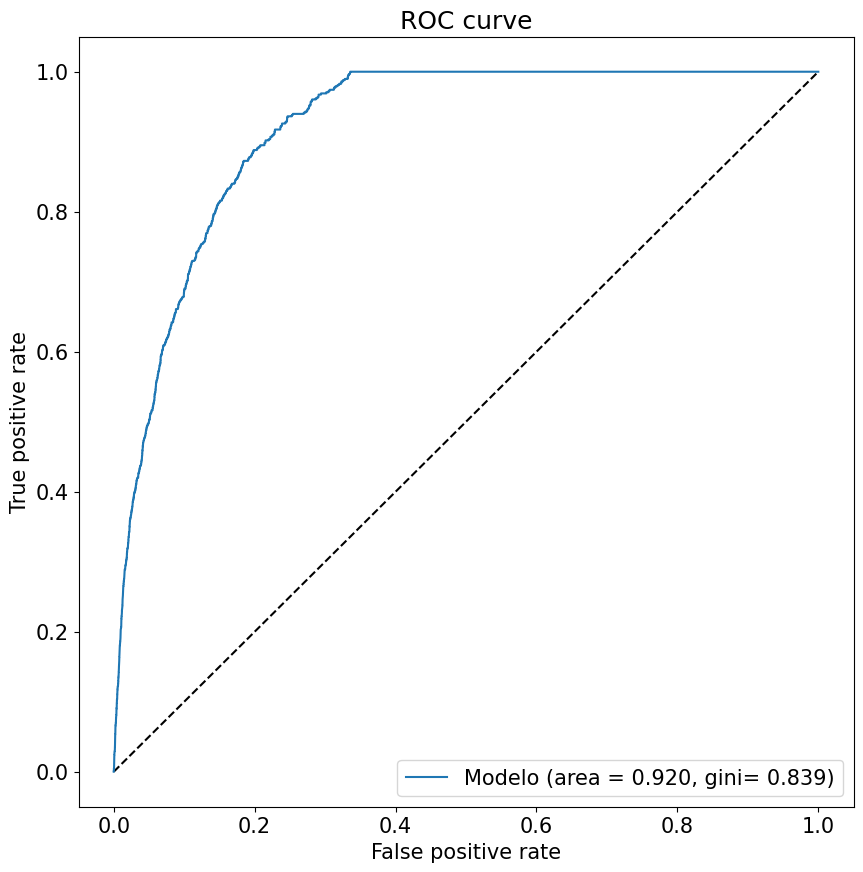

In [222]:
roc_auc=roc_gini(model_lgb)

# AJUSTE DE HIPERPARAMETROS

# sacaremos los mejores parametros de los modelos utilizados

1. Modelo de regresion logistica

In [223]:
# los modelos a usar seran LR, xgb y lgb
# LR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

In [224]:
model_lr = LogisticRegression()
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='accuracy')

In [225]:
# Ajustar el GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train_resampled, y_train_resampled)

c:\Users\jvald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jvald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jvald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jvald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jvald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [226]:
# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

Mejores parámetros: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [251]:
model_LR = LogisticRegression(penalty='l2', C= 10.0 , solver= 'liblinear')

In [252]:
model_LR.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=10.0, solver='liblinear')

In [253]:
print(model_LR.score(X_test, y_test))

0.7881144009918676


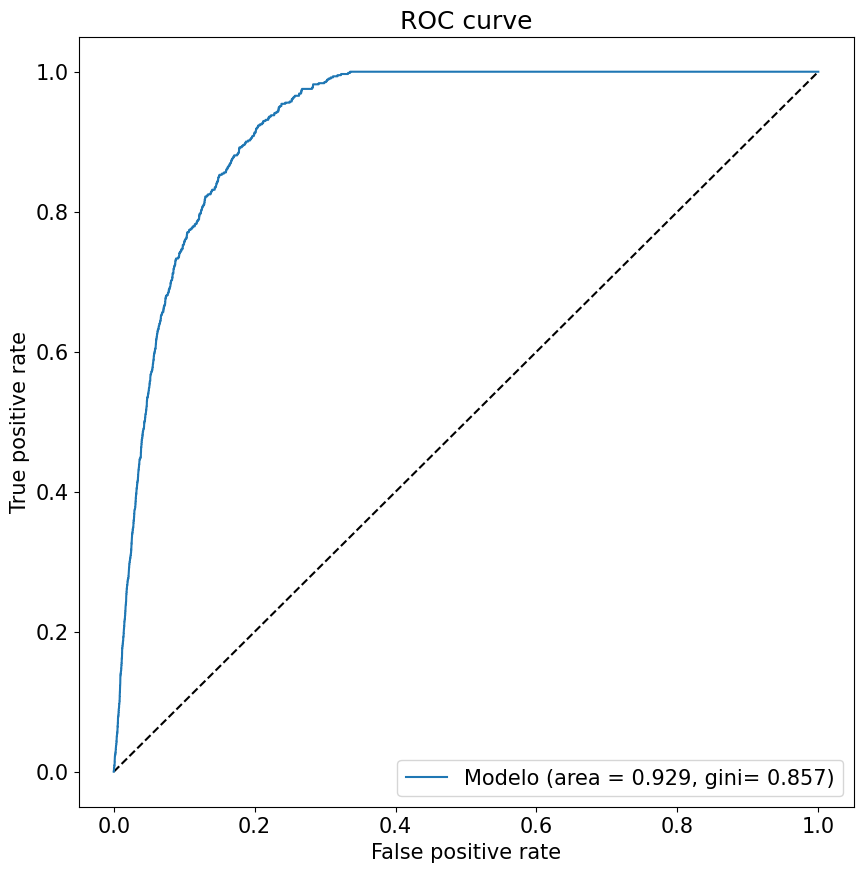

In [254]:
roc_auc=roc_gini(model_LR)

Reporte de metricas XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     94563
           1       0.03      0.93      0.05       611

    accuracy                           0.79     95174
   macro avg       0.51      0.86      0.47     95174
weighted avg       0.99      0.79      0.88     95174

Matriz de Confusión:
 [[74440 20123]
 [   43   568]]


Text(0, 0.5, 'Valor Real')

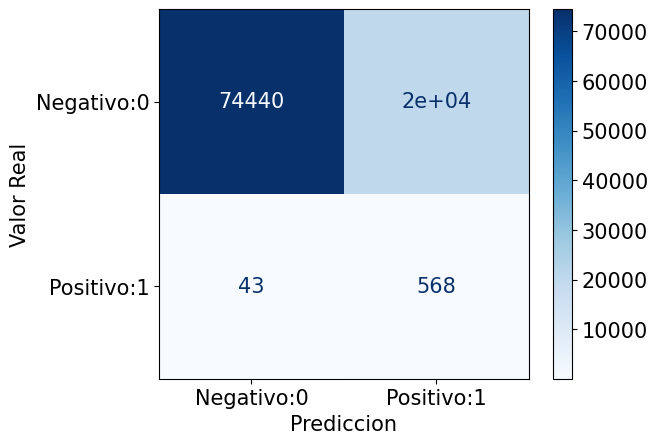

In [255]:
y_preds = model_LR.predict(X_test)
print("Reporte de metricas XGBoost: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)


mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

2. Modelo XGB classifier

In [231]:
#xgb

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Crear un modelo XGBClassifier
model = XGBClassifier()

# Crear un objeto GridSearchCV y configurarlo con el modelo, los parámetros y la métrica de evaluación
grid_search = GridSearchCV(model, param_grid, scoring='accuracy')

In [232]:
# Ajustar el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [233]:
best_params = grid_search.best_params_

In [234]:
print("Mejores parámetros:", best_params)

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [256]:
model_xgb = XGBClassifier(learning_rate = 0.1 , max_depth = 5, n_estimators = 300)

In [257]:
model_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [258]:
print(model_xgb.score(X_test, y_test))

0.8548763317712821


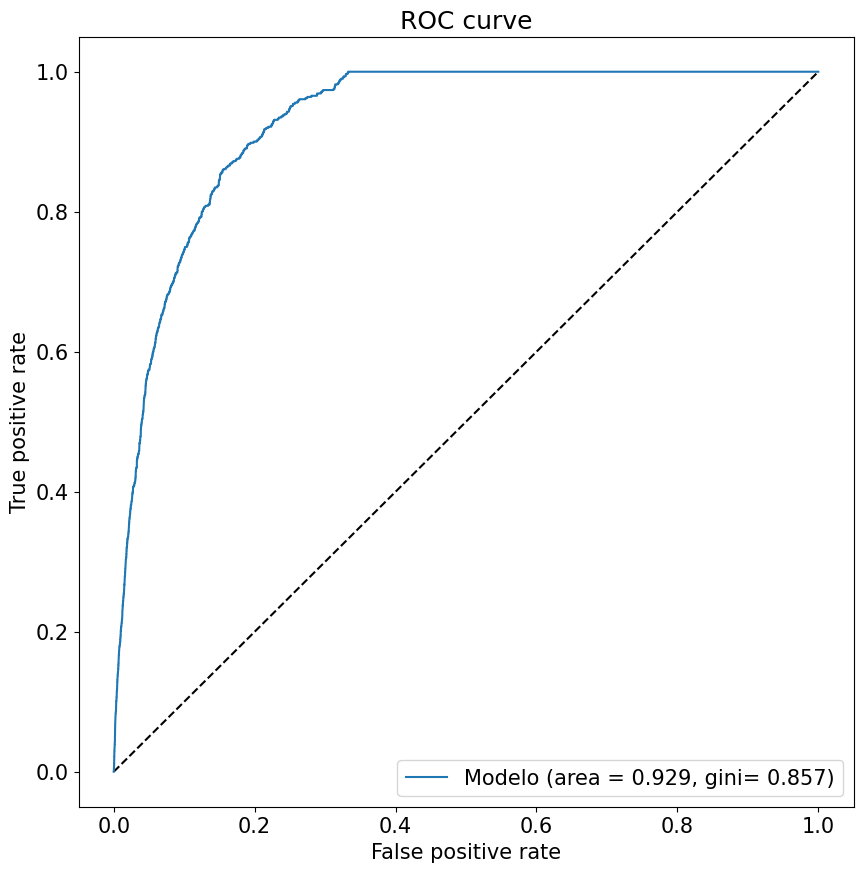

In [259]:
roc_auc=roc_gini(model_xgb)

Reporte de metricas XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92     94563
           1       0.04      0.83      0.07       611

    accuracy                           0.85     95174
   macro avg       0.52      0.84      0.50     95174
weighted avg       0.99      0.85      0.92     95174

Matriz de Confusión:
 [[80852 13711]
 [  101   510]]


Text(0, 0.5, 'Valor Real')

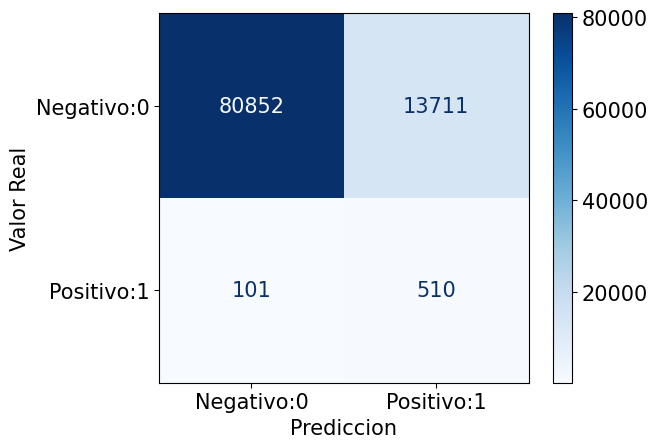

In [260]:
y_preds = model_xgb.predict(X_test)
print("Reporte de metricas XGBoost: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)


mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

3. Modelo LGB

In [239]:
#lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

In [240]:
# Crear un modelo LGBMClassifier
model = LGBMClassifier()

In [241]:
# Crear un objeto GridSearchCV y configurarlo con el modelo, los parámetros y la métrica de evaluación
grid_search = GridSearchCV(model, param_grid, scoring='accuracy')

In [242]:
# Ajustar el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='accuracy')

In [243]:
# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 40}


In [261]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=300, num_leaves=40)
model_lgb.fit(X_train_resampled, y_train_resampled)

LGBMClassifier(n_estimators=300, num_leaves=40)

In [262]:
print(model_lgb.score(X_test, y_test))

0.8958959379662513


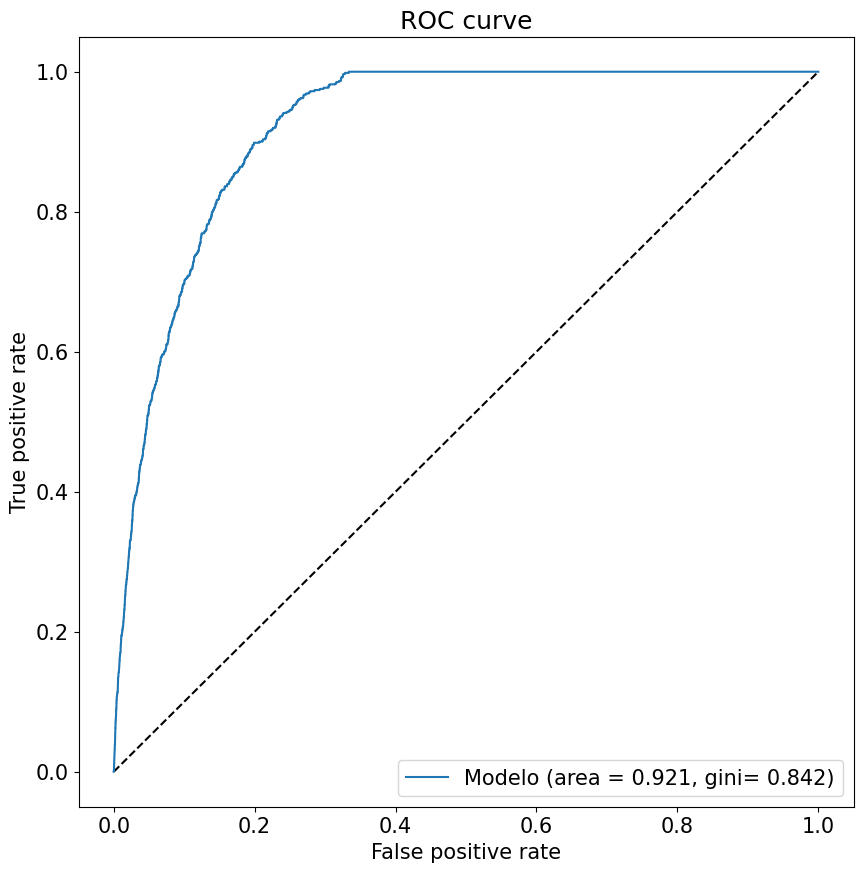

In [263]:
roc_auc=roc_gini(model_lgb)

Reporte de metricas XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.94     94563
           1       0.04      0.71      0.08       611

    accuracy                           0.90     95174
   macro avg       0.52      0.80      0.51     95174
weighted avg       0.99      0.90      0.94     95174

Matriz de Confusión:
 [[84835  9728]
 [  180   431]]


Text(0, 0.5, 'Valor Real')

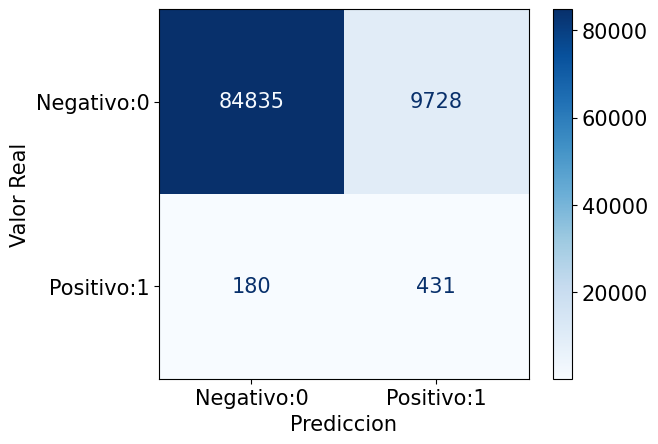

In [264]:
y_preds = model_lgb.predict(X_test)
print("Reporte de metricas XGBoost: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)


mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

# ENSAMBLE DE LOS 3 MODELOS

In [247]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = LGBMClassifier(n_estimators=300, num_leaves=40)  # Ajusta los parámetros de LGBM
xgb_model = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1)  # Ajusta los parámetros de XGBoost
lr_model = LogisticRegression()  # Ajusta los parámetros de Regresión Logística si es necesario

estimators = [('lgb', lgb_model), ('xgb', xgb_model)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=lr_model)

# REALIZAMOS EL ESCALAMIENTO DE LOS DATOS DE ENTRENAMIENTO Y TESTEO
st_x=RobustScaler()

X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)

from imblearn.over_sampling import RandomOverSampler

# Crear el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo a ambos conjuntos
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

stacking_model.fit(X_train_resampled, y_train_resampled)

predictions = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)


In [248]:
print(stacking_model.score(X_test, y_test))

0.9331645197217727


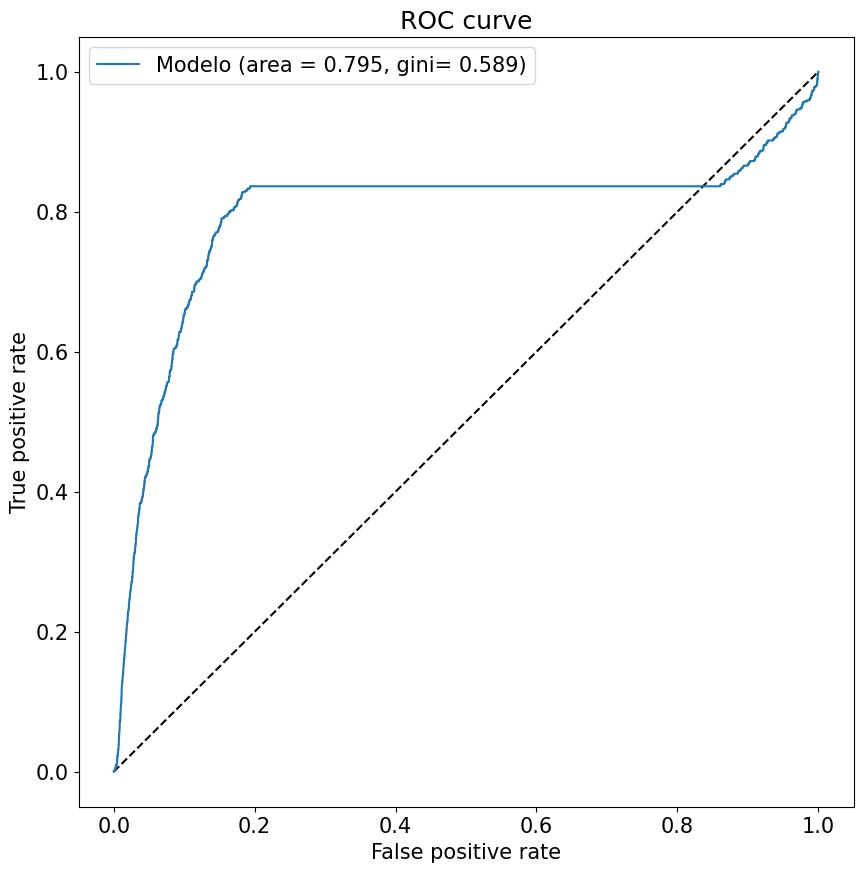

In [249]:
roc_auc=roc_gini(stacking_model)

Reporte de metricas XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     94563
           1       0.05      0.51      0.09       611

    accuracy                           0.93     95174
   macro avg       0.52      0.72      0.53     95174
weighted avg       0.99      0.93      0.96     95174

Matriz de Confusión:
 [[88499  6064]
 [  297   314]]


Text(0, 0.5, 'Valor Real')

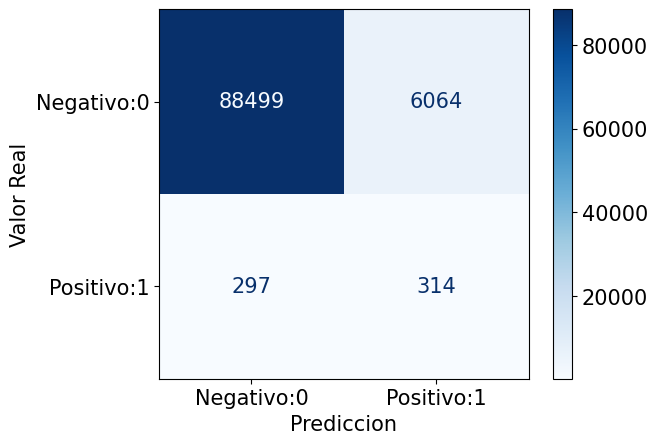

In [250]:
y_preds = stacking_model.predict(X_test)
print("Reporte de metricas XGBoost: \n", classification_report(y_test, y_preds))
matriz = confusion_matrix(y_test, y_preds)
print('Matriz de Confusión:\n',matriz)


mc=confusion_matrix(y_test,y_preds)
cm_display =ConfusionMatrixDisplay(mc,display_labels=["Negativo:0", "Positivo:1"]).plot(cmap=plt.cm.Blues)
cm_display.ax_.set_xlabel("Prediccion")
cm_display.ax_.set_ylabel("Valor Real")

## GUARDANDO LOS MODELOS DE ENTRENAMIENTO

In [266]:
import joblib

# Guardar el modelo entrenado
joblib.dump(model_LR, 'modelo_LR.pkl')

['modelo_LR.pkl']

In [267]:
# Guardar el modelo entrenado
joblib.dump(model_xgb, 'modelo_XGB.pkl')

['modelo_XGB.pkl']

In [268]:
# Guardar el modelo entrenado
joblib.dump(model_lgb, 'modelo_LGB.pkl')

['modelo_LGB.pkl']